# DLC Overview

The [DeepLabCut](https://www.nature.com/articles/s41596-019-0176-0.epdf?author_access_token=YdgZNNupsH23JNKsogan2tRgN0jAjWel9jnR3ZoTv0PafSJfogKvzMN9Yibs0_Cn5RrZDjtijUWL61FeNFC2vYig0gH-hrXbchDCvAxDsQhlBRStoRflJdbJePPUfES7jig_npStoBnzkKR817z8Tw%3D%3D) paper provides an overview of the workflow. It mentions that DeepLabCut uses deep, residual networks with either 50 or 101 layers (ResNets) and deconvolutional layers, whereas LEAP uses 15-layer convolutional network. DeepLabCut uses pre-trained networks and benefits from transfer learning, whereas LEAP trains from scratch hence may be faster. 

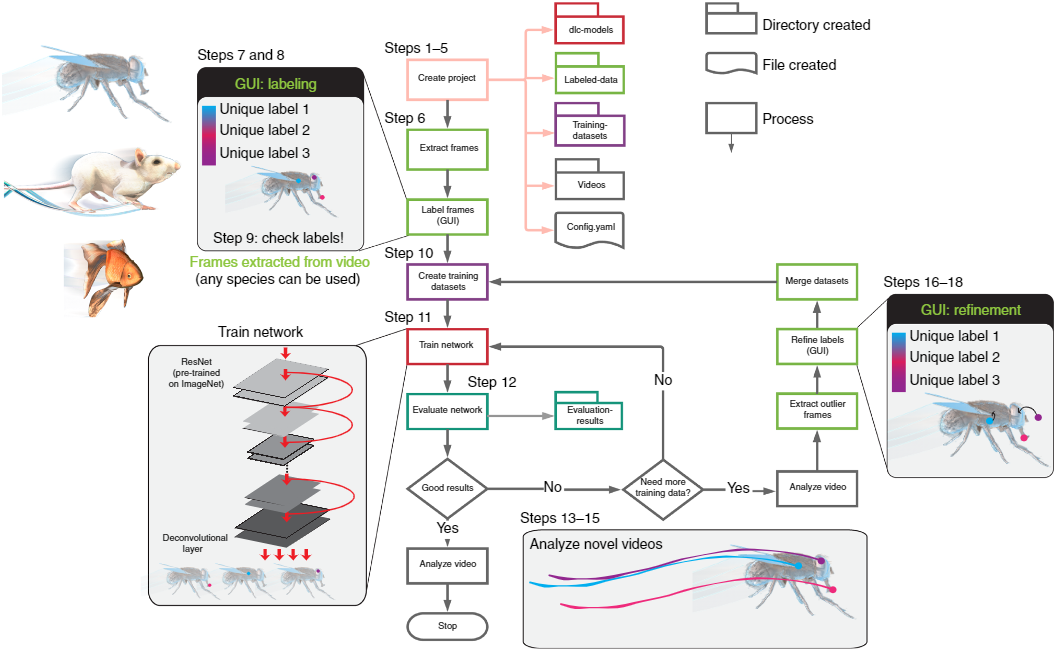

### Some DLC Notes

The default directory for DLC projects is the User Desktop. You may create the project on the Desktop, and copy the folder to the Home Folder before creating the training datasets. Alternatively, you may create the project in the Home Folder as shown below.

Open a python session in terminal by typing `python` in the DEEPLABCUT environment, then run the following commands: 

    import deeplabcut
    deeplabcut.create_new_project('dlc-prelabeled','louise', ['C://s3-mount//dlc-sample-videos//mouse-movement-videos//mouse-top-view.mp4'], working_directory='C://Users//PhotonUser//My Files//Home Folder',copy_videos=False)
    
This will create the project `dlc-prelabeled-louise-2023-07-31` folder inside Home Folder. More details on deeplabcut functions are available at the [functiondetails](https://github.com/DeepLabCut/DeepLabCut/blob/53a784b95a0d31b403deab0541b4770fd001448f/docs/functionDetails.md), or use the python help function to see the function documentations. 

In [2]:
import deeplabcut

In [2]:
help(deeplabcut.create_new_project)

Help on function create_new_project in module deeplabcut.create_project.new:

create_new_project(project, experimenter, videos, working_directory=None, copy_videos=False, videotype='', multianimal=False)
    Create the necessary folders and files for a new project.
    
    Creating a new project involves creating the project directory, sub-directories and
    a basic configuration file. The configuration file is loaded with the default
    values. Change its parameters to your projects need.
    
    Parameters
    ----------
    project : string
        The name of the project.
    
    experimenter : string
        The name of the experimenter.
    
    videos : list[str]
        A list of strings representing the full paths of the videos to include in the
        project. If the strings represent a directory instead of a file, all videos of
        ``videotype`` will be imported.
    
    working_directory : string, optional
        The directory where the project will be created. 

If you ran create training datasets before copying the files to the Home Folder, the training data will contain the paths to the original Desktop location. Suppose you open an AppStream session the next day and try to start training the network, you will notice errors because the files on the Desktop would be cleared.The underlying Desktop path would also be different, so if you try to copy the files in Home Folder back onto the Desktop, the error would still persist. However, you can fix this by going to the `create training dataset` tab and run that again. This will update the training data path to the path in Home Folder, and you can continue training the network successfully. 

## DLC TRAINING

In `config.yaml` specify the body parts, skeleton, the training fraction `0.8`. 

    - Other changes I made: Change point size to 8, change color to "jet"
    - The `pcutoff` attribute in config.yaml controls the confidence / likelihood cutoff level that DLC uses to filter out predictions before creating the video. 

Label frames in the Napari pop-up window, then save selected layer to create a `CollectedData_louise.csv` file and `.h5` file in the `labeled-data` folder containing the label coordinates. 

After labeling the extracted frames, `create training dataset` will combine the labeled datasets from all the videos (only one video for our comparison) under the `training-dataset` folder. Notice that you may create multiple separate training datasets by changing the shuffle number. 

Before training the network, configure to do only 2000 iterations. You can modify the training parameters in the GUI directory or in the `dlc-models\iteration0\train\pose_cfg.yaml` before training the network. This will create a train and test folder under `dlc-models` folder. 

- It is recommended to train the networks for thousands of iterations until the loss plateaus (typically around 500,000) if you use batch size 1, and 50-100K if you use batchsize 8 (the default).
- The variables `display_iters` and `save_iters` in the pose_cfg.yaml file allows the user to alter how often the loss is displayed and how often the weights are stored.

### Evaluate model performance

Evaluate trained network will compute performance metrics such as train and test errors (**evaluation metric 1**, in `CombinedEvaluationResults` file) by comparing manual labels and predicted labels. They will be saved in the `evaluation-results` folder. 

If you click the `Plot 3 test maps` button, this will create some images in the `evaluation-results/iteration-0/dlc-testJul25-trainset80shuffle1/maps/` folder. 

### Predict on entire video

Finally, you can use the network to analyze new videos (or the same video in this case). The prediction coordinates and likelihoods will be saved as an `.csv` file under the same directory as the video file (along with an H5 file and a PICKLE file). If you select the `plot trajectories` option in the GUI, it will create a `plot-poses` folder in the directory of the video, and it will contain some trajectory plots such as coordinates of body parts vs. time, likelihoods vs time.

**Ideally you would only do this after you are done with prediction-assisted labeling and are satitsfied with your model performance**

Suppose you modify the skeleton color in the config.yaml file and want to create a new video, the GUI will not procees because it detects that a video file with the default filename already exists (selecting overwrite videos option doesn't help). If you want to create multiple videos, rename the existing video files to another name, then click `create video` to create a new video file with the same default filename. 

### Prediction-assisted labeling

Extract outlier frames will extract 20 more frames in `labeled-data` along with a `machinelabels.csv` and `machinelabels-iter0.h5` file. Click `Labeling GUI` to refine labels, note that only the extracted outlier frames will be editable, the previously labeled frames that were used for training will not be editable. After saving, click `Merge Data`. This will update the `labeled-data/CollectedData_louise.csv` file to include the refined labels as well. 

Now go back to the `Create training dataset` tab to create a new training dataset under the `training-datasets/iteration-1/` folder. Repeat the training and evaluation process until you are satisfied, then create predictions on the entire video. 

### Create Labeled Video

You can also create labeled videos (**evaluation metric 2**, under `videos\mouse-top-viewDLC_resnet50_dlc-mouse-topviewJul24shuffle1_20_labeled.mp4`). Click `Build skeleton` first to join nodes, then click `Create videos` to create a video with the skeleton drawn. Remember that skeleton configurations in the `config.yaml` file control what the skeleton should look like. 


## DLC TRAINING with imported DLC data

In order to use the imported data from github, the image file paths and the experimenter name must match. You could modify the imported csv, but for simplicity, I just created a project where Pranav is the experimenter, renamed my `labeled-data/mouse-top-view/` folder into `labeled-data/m4s1/` and moved the contents in the github labeled-data directory into the renamed directory. Remember to modify the config.yaml file, most importantly the training fraction section and bodyParts section. Then you can continue with creating training datasets etc. 


You may also use the deeplabcut function to change the experimenter name. However, it does not modify the image file paths, so you must still ensure that the file paths match up. First, rename `labeled-data/mouse-top-view/` folder into `labeled-data/m4s1/` and moved the contents in the github labeled-data directory into the renamed directory. Then, rename `videos/mouse-top-view.mp4` into `videos/m4s1.mp4`. Finally, update the video file name in the in the config.yaml file `video_sets` section. Then run the following command in a python session:

    deeplabcut.convertcsv2h5('C:\\ProgramData\\UserDataFolders\\S-1-5-21-3098806350-513340488-2980939788-1012\\My Files\\Home Folder\\dlc-prelabeled-louise-2023-07-31\\config.yaml', scorer="louise")

In [8]:
help(deeplabcut.convertcsv2h5)

Help on function convertcsv2h5 in module deeplabcut.utils.conversioncode:

convertcsv2h5(config, userfeedback=True, scorer=None)
    Convert (image) annotation files in folder labeled-data from csv to h5.
    This function allows the user to manually edit the csv (e.g. to correct the scorer name and then convert it into hdf format).
    
    config : string
        Full path of the config.yaml file as a string.
    
    userfeedback: bool, optional
        If true the user will be asked specifically for each folder in labeled-data if the containing csv shall be converted to hdf format.
    
    scorer: string, optional
        If a string is given, then the scorer/annotator in all csv and hdf files that are changed, will be overwritten with this name.
    
    Examples
    --------
    Convert csv annotation files for reaching-task project into hdf.
    >>> deeplabcut.convertcsv2h5('/analysis/project/reaching-task/config.yaml')
    
    --------
    Convert csv annotation files for rea

### Train Results

For default configuration of 100,000 iterations, it ran for 3h, on average 1-2 min per 1000 iterations. 

- Begin train: 10:22 am
- 5000 iteration: 10:32 am
- 9000 iteration: 10:42 am
- 14,000 iteration: 10:49 am
- 16,000 iteration: 11:06 am
- 20,000 iteration: 11:12 am
- 25,000 iteration: 11:22 am
- 30,000 iteration: 11:30 am
- 43,000 iteration: 11:51 am
- 50,000 iteration 12:03 pm
- 70,000 iteration 12:37 pm
- 80,000 iteration 12:55 pm
- Finish train: 1:27 pm

### Evaluation Results (in progress)

In [3]:
import pandas as pd
from pathlib import Path

NOTEBOOK_DIR = Path.cwd()
DLC_PROJECT_DIR = NOTEBOOK_DIR / "dlc-prelabeled-Pranav-2023-07-27"
EVAL_DIR = DLC_PROJECT_DIR / "evaluation-results" / "iteration-0"
pd.read_csv(str(EVAL_DIR / "CombinedEvaluation-results.csv" ))

,Unnamed: 0,Training iterations:,%Training dataset,Shuffle number,Train error(px),Test error(px),p-cutoff used,Train error with p-cutoff,Test error with p-cutoff
0,0,100000,80,1,2.24,3.44,0.6,2.24,3.44


# Format DLC predictions for Sleap evaluation and visualization (in progress)

Either evaluate separately, or import DLC predictions into Sleap to evaluate model and visualize result. 

Import Predictions CSV error: ValueError: Skeleton already has a node named (head)

- Possible reason: csv has extra column likelihood
- Solution: try to export csv in dlc in previous format

## Format Sleap Predictions for DLC Visualiztaion (blocked)

ISSUE: Cannot extract the labeled images file from .slp file, but DLC csv needs those paths and image files. 

In [2]:
import h5py
import matplotlib.pyplot as plt

filename = "C:/Users/louise.xu/Downloads/mouse-labels.h5" # or your own exported filename

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

    print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations (tracks) data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
C:/Users/louise.xu/Downloads/mouse-labels.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations (tracks) data shape===
(2330, 2, 2, 1)

===nodes===
0: head
1: tailBase



Need to formate csv into dlc acceptable format as instructed [here](https://github.com/DeepLabCut/DeepLabCut/wiki/Using-labeled-data-in-DeepLabCut-that-was-annotated-elsewhere-(or-merge-across-labelers))

In [98]:
import numpy as np
import pandas as pd
locations = locations.reshape((2330, 4))

bodyparts = []
coords = []
scorer = []
scorer_name = "louise"
for name in node_names:
    bodyparts += [name]*2
    coords += ["x"]
    coords += ["y"]
    scorer += [scorer_name]*2

def convert_df (arr):
    return pd.DataFrame(np.array([arr]))

df = pd.DataFrame(locations)

df = pd.concat([convert_df(bodyparts), convert_df(coords), df])
df.columns = scorer
df
#np.savetxt("C:/Users/louise.xu/Downloads/sleap-mouse-predictions.csv", locations_csv, delimiter=",", header=header, comments="")

,louise,louise,louise,louise
0,head,head,tailBase,tailBase
0,x,y,x,y
0,76.977142,88.586418,140.419189,187.721466
1,76.211014,87.9543,140.592499,180.707001
2,75.789993,84.666412,143.833466,176.909729
...,...,...,...,...
2325,347.900238,380.163879,424.336731,443.984863
2326,349.19101,380.117371,428.229675,443.702759
2327,352.273102,380.147186,428.39679,443.756714
2328,356.354065,380.305115,432.69458,440.235352


In [3]:
import deeplabcut
help(deeplabcut.create_labeled_video)
#%cd C:\Users\louise.xu\projects\Deeplabcut\examples\openfield-Pranav-2018-10-30
#deeplabcut.create_labeled_video('config.yaml', ['./videos/m3v1mp4.mp4'])

Help on function create_labeled_video in module deeplabcut.utils.make_labeled_video:

create_labeled_video(config, videos, videotype='', shuffle=1, trainingsetindex=0, filtered=False, fastmode=True, save_frames=False, keypoints_only=False, Frames2plot=None, displayedbodyparts='all', displayedindividuals='all', codec='mp4v', outputframerate=None, destfolder=None, draw_skeleton=False, trailpoints=0, displaycropped=False, color_by='bodypart', modelprefix='', init_weights='', track_method='', superanimal_name='', pcutoff=0.6, skeleton=[], skeleton_color='white', dotsize=8, colormap='rainbow', alphavalue=0.5, overwrite=False)
    Labels the bodyparts in a video.
    
    Make sure the video is already analyzed by the function
    ``deeplabcut.analyze_videos``.
    
    Parameters
    ----------
    config : string
        Full path of the config.yaml file.
    
    videos : list[str]
        A list of strings containing the full paths to videos for analysis or a path
        to the director